In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('PS1-Artists.csv')

In [3]:
df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Count of Work
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,2
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,1
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,26
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,1
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,18
...,...,...,...,...,...,...,...,...
15238,135018,Abdoulaye Konaté,"Malian, born 1953",Malian,NaN,1953,0,1
15239,135032,Yolanda Lopez,"American, 1942 – 2021",American,Female,1942,2021,0
15240,135042,Arnt Jensen,"Danish, born 1971",Danish,Male,1971,0,0
15241,135111,After Sophie Taeuber-Arp,"French, born Switzerland. 1889–1943",NaN,NaN,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15243 entries, 0 to 15242
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ConstituentID  15243 non-null  int64 
 1   DisplayName    15243 non-null  object
 2   ArtistBio      13028 non-null  object
 3   Nationality    12771 non-null  object
 4   Gender         12078 non-null  object
 5   BeginDate      15243 non-null  int64 
 6   EndDate        15243 non-null  int64 
 7   Count of Work  15243 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 952.8+ KB


As you can there some columns with null values .

ArtistBio, Nationality, Gender

In [5]:


# Check for null values in all columns
null_values = df.isnull().sum()

# Print the null values count for each column
for column, count in null_values.items():
    print(f"{column}: {count} null values")

# Check if any column has null values
if null_values.any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")


ConstituentID: 0 null values
DisplayName: 0 null values
ArtistBio: 2215 null values
Nationality: 2472 null values
Gender: 3165 null values
BeginDate: 0 null values
EndDate: 0 null values
Count of Work: 0 null values
There are null values in the DataFrame.


In [6]:


# Check for missing values in the entire DataFrame
if df.isnull().values.any():
    # Remove rows with missing values
    df = df.dropna()

    # Optional: Reset the index if you want to reindex the DataFrame
    df = df.reset_index(drop=True)

    print("Rows with missing values have been removed.")
else:
    print("No missing values found in the DataFrame.")

# Now 'df' contains rows with missing values removed



Rows with missing values have been removed.


Here i have used mode to tackel the null values the most frequest category .

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11420 entries, 0 to 11419
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ConstituentID  11420 non-null  int64 
 1   DisplayName    11420 non-null  object
 2   ArtistBio      11420 non-null  object
 3   Nationality    11420 non-null  object
 4   Gender         11420 non-null  object
 5   BeginDate      11420 non-null  int64 
 6   EndDate        11420 non-null  int64 
 7   Count of Work  11420 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 713.9+ KB


In [8]:
df.sample(5)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Count of Work
7814,27888,Ralph Borland,"South African, born 1974",South African,Male,1974,0,1
654,768,André Breton,"French, 1896–1966",French,Male,1896,1966,5
4481,5258,Fritz Scholder,"American, 1937–2005",American,Male,1937,2005,1
7303,22583,Chris Chapman,"British, born 1964",British,Male,1964,0,0
2232,2632,Nankoku Hidai,"Japanese, 1912–1999",Japanese,Male,1912,1999,5


In [9]:
# Extract born year using regular expression
df['BornYear'] = df['ArtistBio'].str.extract(r'born (\d{4})', expand=False)

# Extract categorical information (excluding born year)
df['CategoricalInfo'] = df['ArtistBio'].str.replace(r',? born \d{4}', '').str.strip()



C:\Users\sohan\AppData\Local\Temp\ipykernel_8348\420016415.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CategoricalInfo'] = df['ArtistBio'].str.replace(r',? born \d{4}', '').str.strip()


In [10]:
df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Count of Work,BornYear,CategoricalInfo
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,2,NaN,"American, 1930–1992"
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,1,1936,Spanish
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,26,1941,American
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,1,1946,American
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,18,1941,Danish
...,...,...,...,...,...,...,...,...,...,...
11415,134919,William Downey,"British, 1829–1915",British,Male,1829,1915,0,NaN,"British, 1829–1915"
11416,134920,Daniel Downey,"British, 1831–1881",British,Male,1831,1881,0,NaN,"British, 1831–1881"
11417,135032,Yolanda Lopez,"American, 1942 – 2021",American,Female,1942,2021,0,NaN,"American, 1942 – 2021"
11418,135042,Arnt Jensen,"Danish, born 1971",Danish,Male,1971,0,0,1971,Danish


In [11]:
df['ArtistBio']

0          American, 1930–1992
1           Spanish, born 1936
2          American, born 1941
3          American, born 1946
4            Danish, born 1941
                 ...          
11415       British, 1829–1915
11416       British, 1831–1881
11417    American, 1942 – 2021
11418        Danish, born 1971
11419      American, 1919–2012
Name: ArtistBio, Length: 11420, dtype: object

In [12]:
# Function to extract nationality and birth information
def extract_info(artist_bio):
    info_list = artist_bio.split(', ')
    nationality = info_list[0]
    birth_info = ', '.join(info_list[1:])
    birth_info = birth_info.replace('born ', '').replace('–', '-')
    return nationality, birth_info



In [13]:
# Applying the function to the 'ArtistBio' column
df[['Nationality', 'BirthInfo']] = df['ArtistBio'].apply(lambda x: pd.Series(extract_info(x)))



In [14]:
# Displaying the updated DataFrame
print(df[['Nationality', 'BirthInfo']])

      Nationality    BirthInfo
0        American    1930-1992
1         Spanish         1936
2        American         1941
3        American         1946
4          Danish         1941
...           ...          ...
11415     British    1829-1915
11416     British    1831-1881
11417    American  1942 - 2021
11418      Danish         1971
11419    American    1919-2012

[11420 rows x 2 columns]


In [15]:
df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Count of Work,BornYear,CategoricalInfo,BirthInfo
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,2,NaN,"American, 1930–1992",1930-1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,1,1936,Spanish,1936
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,26,1941,American,1941
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,1,1946,American,1946
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,18,1941,Danish,1941
...,...,...,...,...,...,...,...,...,...,...,...
11415,134919,William Downey,"British, 1829–1915",British,Male,1829,1915,0,NaN,"British, 1829–1915",1829-1915
11416,134920,Daniel Downey,"British, 1831–1881",British,Male,1831,1881,0,NaN,"British, 1831–1881",1831-1881
11417,135032,Yolanda Lopez,"American, 1942 – 2021",American,Female,1942,2021,0,NaN,"American, 1942 – 2021",1942 - 2021
11418,135042,Arnt Jensen,"Danish, born 1971",Danish,Male,1971,0,0,1971,Danish,1971


In [16]:
df.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Count of Work', 'BornYear', 'CategoricalInfo',
       'BirthInfo'],
      dtype='object')

In [17]:
df = df.drop(['BornYear', 'CategoricalInfo', 'BirthInfo'], axis=1, errors='ignore')

In [18]:
df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Count of Work
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,2
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,1
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,26
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,1
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,18
...,...,...,...,...,...,...,...,...
11415,134919,William Downey,"British, 1829–1915",British,Male,1829,1915,0
11416,134920,Daniel Downey,"British, 1831–1881",British,Male,1831,1881,0
11417,135032,Yolanda Lopez,"American, 1942 – 2021",American,Female,1942,2021,0
11418,135042,Arnt Jensen,"Danish, born 1971",Danish,Male,1971,0,0


In [19]:
df = df.drop(['ArtistBio'], axis=1, errors= 'ignore')

In [20]:
df

,ConstituentID,DisplayName,Nationality,Gender,BeginDate,EndDate,Count of Work
0,1,Robert Arneson,American,Male,1930,1992,2
1,2,Doroteo Arnaiz,Spanish,Male,1936,0,1
2,3,Bill Arnold,American,Male,1941,0,26
3,4,Charles Arnoldi,American,Male,1946,0,1
4,5,Per Arnoldi,Danish,Male,1941,0,18
...,...,...,...,...,...,...,...
11415,134919,William Downey,British,Male,1829,1915,0
11416,134920,Daniel Downey,British,Male,1831,1881,0
11417,135032,Yolanda Lopez,American,Female,1942,2021,0
11418,135042,Arnt Jensen,Danish,Male,1971,0,0


Here ArtistBio had a problem category and born year detials so i haved removed it and seperated it with two columns Natinality 

Now I will convert Gender into one hot encoding

In [21]:
df['Gender'].unique()

array(['Male', 'Female', 'Non-Binary', 'male', 'female', 'Non-binary'],
      dtype=object)

In [22]:
# Standardizing gender values
df['Gender'] = df['Gender'].str.lower().replace({'male': 'Male', 'female': 'Female', 'non-binary': 'Non-Binary'})


In [23]:
df['Gender'].unique()

array(['Male', 'Female', 'Non-Binary'], dtype=object)

In [24]:
gender_mapping = {'Male': 0, 'Female': 1, 'Non-Binary': 2}
df['Gender_Numerical'] = df['Gender'].map(gender_mapping)



In [25]:
df

,ConstituentID,DisplayName,Nationality,Gender,BeginDate,EndDate,Count of Work,Gender_Numerical
0,1,Robert Arneson,American,Male,1930,1992,2,0
1,2,Doroteo Arnaiz,Spanish,Male,1936,0,1,0
2,3,Bill Arnold,American,Male,1941,0,26,0
3,4,Charles Arnoldi,American,Male,1946,0,1,0
4,5,Per Arnoldi,Danish,Male,1941,0,18,0
...,...,...,...,...,...,...,...,...
11415,134919,William Downey,British,Male,1829,1915,0,0
11416,134920,Daniel Downey,British,Male,1831,1881,0,0
11417,135032,Yolanda Lopez,American,Female,1942,2021,0,1
11418,135042,Arnt Jensen,Danish,Male,1971,0,0,0


In [26]:
# Removing the original 'Gender' column
df = df.drop(['Gender'], axis=1)

In [27]:
df

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
0,1,Robert Arneson,American,1930,1992,2,0
1,2,Doroteo Arnaiz,Spanish,1936,0,1,0
2,3,Bill Arnold,American,1941,0,26,0
3,4,Charles Arnoldi,American,1946,0,1,0
4,5,Per Arnoldi,Danish,1941,0,18,0
...,...,...,...,...,...,...,...
11415,134919,William Downey,British,1829,1915,0,0
11416,134920,Daniel Downey,British,1831,1881,0,0
11417,135032,Yolanda Lopez,American,1942,2021,0,1
11418,135042,Arnt Jensen,Danish,1971,0,0,0


In [28]:
d = df.duplicated()
d

0        False
1        False
2        False
3        False
4        False
         ...  
11415    False
11416    False
11417    False
11418    False
11419    False
Length: 11420, dtype: bool

In [29]:
df['Count of Work'].unique()

array([   2,    1,   26,   18,    0,  218,   54,   56,   33,   50,    7,
         40,    6,   78,   20,   42,   61,    3,   17,    4,  288,   62,
         72,   11,   36,   10,  198,  291,   12,  428,   16,    5,   45,
         60,   15,   24,   48,   13,  109,   51,   75,   69,   79,   31,
         83,   35,   30, 5050,   19,    8,   14,   76,   91,    9,   37,
         28,   53,   23,   70,  100,   65,  138,  263,   27,  165,   22,
         93,   25,  220,   58,   55,  102,  630,   95,  324,  104,  283,
         34,   39,  297,  901,   49, 3336,   41,  105,  176,  112,  223,
         92,   77,   21,   29,   88,   46,   66,  293,  247,  181,  306,
         47,   38, 1161,  116,   90,  175,  110,   74,   82,   32,  189,
         71,   64,   43,   98,   52,  504,  571,  427,  402,  103, 1435,
        221,  545,  128,  219,  114,   81,  242,  363,  224,  228,   96,
         63,   59,  205,  257, 1320,   85,  173,  122,  134,   44,  234,
        101,  108,   86,  177,  132,  237,   80,  4

Seeing this columns it is visible that there is outliers because of the distribution of the data 

In [30]:
df.columns

Index(['ConstituentID', 'DisplayName', 'Nationality', 'BeginDate', 'EndDate',
       'Count of Work', 'Gender_Numerical'],
      dtype='object')

In [31]:
df.sample(5)

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
8464,30959,Alexander Kluge,German,1932,0,0,0
5731,6755,Dennis Burton,Canadian,0,0,1,0
2383,2804,Hisae Imai,Japanese,1931,2009,1,1
10714,49594,Julio Agostinelli,Brazilian,1919,0,1,0
10103,44163,Justo Solsona,Argentine,1931,0,0,0


In [32]:
df['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', 'Israeli', 'British', 'Finnish', 'Polish',
       'Palestinian', 'Japanese', 'Guatemalan', 'Colombian', 'Romanian',
       'German', 'Argentine', 'Kuwaiti', 'Belgian', 'Dutch', 'Norwegian',
       'Chilean', 'Swiss', 'Costa Rican', 'Czech', 'Brazilian',
       'Austrian', 'Canadian', 'Russian', 'Australian', 'Ukrainian',
       'Hungarian', 'Haitian', 'American,1931–2013', 'Congolese',
       'Bolivian', 'American,1915–2003', 'American,1895–1957', 'Cuban',
       'Slovenian', 'Portuguese', 'Nationality unknown', 'Indian',
       'Peruvian', 'Icelandic', 'Irish', 'American,1926–2000',
       'American,1928–2010', 'American,1924–2007', 'Romanian and French',
       'Croatian', 'Uruguayan', 'Slovak', 'American,1946–2015',
       'American and Mexican', 'British and American', 'Greek',
       'Venezuelan', 'Belgian and American', 'French and American',
       'Native American (Cahuilla)', 

In [33]:
import pandas as pd

# Assuming your DataFrame is called df and the column is 'Nationality'
df['Nationality'] = df['Nationality'].str.replace(r'\d{4}[-–]?\d{4}', '', regex=True)  # Remove years
df['Nationality'] = df['Nationality'].str.replace(r'\(.*?\)', '', regex=True)  # Remove content within parentheses
df['Nationality'] = df['Nationality'].str.replace(r'est\..*?(\d{4})?', '', regex=True)  # Remove 'est.' and associated years
df['Nationality'] = df['Nationality'].str.replace(r'born.*?(\d{4})?', '', regex=True)  # Remove 'born' and associated years
df['Nationality'] = df['Nationality'].str.replace(r'active.*?(\d{4})?', '', regex=True)  # Remove 'active' and associated years
df['Nationality'] = df['Nationality'].str.replace(r'\[.*?\]', '', regex=True)  # Remove content within square brackets
df['Nationality'] = df['Nationality'].str.replace(r'\d', '', regex=True)  # Remove numeric characters
df['Nationality'] = df['Nationality'].str.strip()  # Remove leading and trailing whitespaces

# Print unique values to verify the changes
print(df['Nationality'].unique())


['American' 'Spanish' 'Danish' 'Italian' 'French' 'Estonian' 'Mexican'
 'Swedish' 'Israeli' 'British' 'Finnish' 'Polish' 'Palestinian' 'Japanese'
 'Guatemalan' 'Colombian' 'Romanian' 'German' 'Argentine' 'Kuwaiti'
 'Belgian' 'Dutch' 'Norwegian' 'Chilean' 'Swiss' 'Costa Rican' 'Czech'
 'Brazilian' 'Austrian' 'Canadian' 'Russian' 'Australian' 'Ukrainian'
 'Hungarian' 'Haitian' 'American,' 'Congolese' 'Bolivian' 'Cuban'
 'Slovenian' 'Portuguese' 'Nationality unknown' 'Indian' 'Peruvian'
 'Icelandic' 'Irish' 'Romanian and French' 'Croatian' 'Uruguayan' 'Slovak'
 'American and Mexican' 'British and American' 'Greek' 'Venezuelan'
 'Belgian and American' 'French and American' 'Native American' 'Turkish'
 'Panamanian' 'Czech,' 'Algerian' 'Ecuadorian' 'South African'
 'Anglo-Irish' 'Iranian' 'Korean' 'Serbian' 'Canadian Inuit' 'Paraguayan'
 'Slovene' 'Ukranian' 'Luxembourger' 'Nicaraguan' 'Zimbabwean'
 'Venezuelan American' 'British,' 'Moroccan' 'Latvian' 'Tanzanian'
 'Catalan Spanish' 'Born Ja

In [34]:
df

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
0,1,Robert Arneson,American,1930,1992,2,0
1,2,Doroteo Arnaiz,Spanish,1936,0,1,0
2,3,Bill Arnold,American,1941,0,26,0
3,4,Charles Arnoldi,American,1946,0,1,0
4,5,Per Arnoldi,Danish,1941,0,18,0
...,...,...,...,...,...,...,...
11415,134919,William Downey,British,1829,1915,0,0
11416,134920,Daniel Downey,British,1831,1881,0,0
11417,135032,Yolanda Lopez,American,1942,2021,0,1
11418,135042,Arnt Jensen,Danish,1971,0,0,0


In [35]:
df.sample(10)

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
5096,5975,William Turnbull,British,1922,2012,9,0
10883,67954,Daniela Lovera,Venezuelan,1968,0,0,1
4146,4857,Nono Reinhold,Dutch,1929,0,4,1
2053,2425,Robert Gwathmey,American,1903,1988,4,0
1701,1999,Elias Friedensohn,American,1924,0,2,0
89,108,Peter Alexander,American,1939,2020,16,0
8527,31054,Kamen Stoyanov,Bulgarian,1977,0,1,0
1506,1780,Philip Evergood,American,1901,1973,5,0
2686,3148,Franz Kline,American,1910,1962,9,0
3070,3602,Antonio Lorenzo,Spanish,0,0,3,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11420 entries, 0 to 11419
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ConstituentID     11420 non-null  int64 
 1   DisplayName       11420 non-null  object
 2   Nationality       11420 non-null  object
 3   BeginDate         11420 non-null  int64 
 4   EndDate           11420 non-null  int64 
 5   Count of Work     11420 non-null  int64 
 6   Gender_Numerical  11420 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 624.7+ KB


In [37]:
df

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
0,1,Robert Arneson,American,1930,1992,2,0
1,2,Doroteo Arnaiz,Spanish,1936,0,1,0
2,3,Bill Arnold,American,1941,0,26,0
3,4,Charles Arnoldi,American,1946,0,1,0
4,5,Per Arnoldi,Danish,1941,0,18,0
...,...,...,...,...,...,...,...
11415,134919,William Downey,British,1829,1915,0,0
11416,134920,Daniel Downey,British,1831,1881,0,0
11417,135032,Yolanda Lopez,American,1942,2021,0,1
11418,135042,Arnt Jensen,Danish,1971,0,0,0


# Data Cleaning is done

# Using of Techniques for the Analysis

In [38]:
df.columns

Index(['ConstituentID', 'DisplayName', 'Nationality', 'BeginDate', 'EndDate',
       'Count of Work', 'Gender_Numerical'],
      dtype='object')

In [39]:
df

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
0,1,Robert Arneson,American,1930,1992,2,0
1,2,Doroteo Arnaiz,Spanish,1936,0,1,0
2,3,Bill Arnold,American,1941,0,26,0
3,4,Charles Arnoldi,American,1946,0,1,0
4,5,Per Arnoldi,Danish,1941,0,18,0
...,...,...,...,...,...,...,...
11415,134919,William Downey,British,1829,1915,0,0
11416,134920,Daniel Downey,British,1831,1881,0,0
11417,135032,Yolanda Lopez,American,1942,2021,0,1
11418,135042,Arnt Jensen,Danish,1971,0,0,0


In [40]:
df.columns

Index(['ConstituentID', 'DisplayName', 'Nationality', 'BeginDate', 'EndDate',
       'Count of Work', 'Gender_Numerical'],
      dtype='object')

In [41]:
df.columns

Index(['ConstituentID', 'DisplayName', 'Nationality', 'BeginDate', 'EndDate',
       'Count of Work', 'Gender_Numerical'],
      dtype='object')

In [42]:
correlation_matrix = df.corr()

C:\Users\sohan\AppData\Local\Temp\ipykernel_8348\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [43]:
correlation_matrix


,ConstituentID,BeginDate,EndDate,Count of Work,Gender_Numerical
ConstituentID,1.000000,0.075485,-0.175615,-0.058210,0.156118
BeginDate,0.075485,1.000000,0.203503,0.030176,0.044061
EndDate,-0.175615,0.203503,1.000000,0.072663,-0.131878
Count of Work,-0.058210,0.030176,0.072663,1.000000,-0.014238
Gender_Numerical,0.156118,0.044061,-0.131878,-0.014238,1.000000


In [44]:
df.columns

Index(['ConstituentID', 'DisplayName', 'Nationality', 'BeginDate', 'EndDate',
       'Count of Work', 'Gender_Numerical'],
      dtype='object')

In [45]:
df

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical
0,1,Robert Arneson,American,1930,1992,2,0
1,2,Doroteo Arnaiz,Spanish,1936,0,1,0
2,3,Bill Arnold,American,1941,0,26,0
3,4,Charles Arnoldi,American,1946,0,1,0
4,5,Per Arnoldi,Danish,1941,0,18,0
...,...,...,...,...,...,...,...
11415,134919,William Downey,British,1829,1915,0,0
11416,134920,Daniel Downey,British,1831,1881,0,0
11417,135032,Yolanda Lopez,American,1942,2021,0,1
11418,135042,Arnt Jensen,Danish,1971,0,0,0


In [46]:
df = pd.DataFrame(df)

# Save DataFrame to CSV file
output_filename = 'output_data2.csv'
df.to_csv(output_filename, index=False)

# Display a message
print(f"Data saved to {output_filename}")


Data saved to output_data2.csv


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#

# Create a new column 'Activity_Level' based on the conditions
df['Activity_Level'] = pd.cut(df['Count of Work'], 
                              bins=[-float('inf'), 100, 500, float('inf')], 
                              labels=['Low Activity', 'Medium Activity', 'High Activity'])


In [48]:
df

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical,Activity_Level
0,1,Robert Arneson,American,1930,1992,2,0,Low Activity
1,2,Doroteo Arnaiz,Spanish,1936,0,1,0,Low Activity
2,3,Bill Arnold,American,1941,0,26,0,Low Activity
3,4,Charles Arnoldi,American,1946,0,1,0,Low Activity
4,5,Per Arnoldi,Danish,1941,0,18,0,Low Activity
...,...,...,...,...,...,...,...,...
11415,134919,William Downey,British,1829,1915,0,0,Low Activity
11416,134920,Daniel Downey,British,1831,1881,0,0,Low Activity
11417,135032,Yolanda Lopez,American,1942,2021,0,1,Low Activity
11418,135042,Arnt Jensen,Danish,1971,0,0,0,Low Activity


In [49]:
# Extract features and target variable
X = df[['Count of Work']]
y = df['Activity_Level']

# Create a decision tree classifier
clf = DecisionTreeClassifier(   # Mean Squared Error, default for regression
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42)

# Train the classifier
clf.fit(X, y)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:

# Now you can use the trained classifier to predict the activity level for new data
# For example, if you have a new value 'new_value', you can predict its activity level as follows:
new_value = 150
predicted_activity_level = clf.predict([[new_value]])
print(f'Predicted Activity Level for {new_value}: {predicted_activity_level[0]}')


Predicted Activity Level for 150: Medium Activity


C:\Users\sohan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is in a pandas DataFrame called df with a column 'Count_of_Work'
# Replace 'df' and 'Count_of_Work' with your actual DataFrame and column name

# Create a new column 'Activity_Level' based on the conditions
df['Activity_Level'] = pd.cut(df['Count of Work'], 
                              bins=[-float('inf'), 100, 500, float('inf')], 
                              labels=['Low Activity', 'Medium Activity', 'High Activity'])



In [52]:
# Extract features and target variable
X = df[['Count of Work']]
y = df['Activity_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the testing set: {accuracy}')



Accuracy on the testing set: 1.0


In [53]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a pandas DataFrame called df with columns 'Count_of_Work' and 'Gender'
# Replace 'df', 'Count_of_Work', and 'Gender' with your actual DataFrame and column names

# Create a new column 'Activity_Level' based on the conditions
df['Activity_Level'] = pd.cut(df['Count of Work'], 
                              bins=[-float('inf'), 100, 500, float('inf')], 
                              labels=['Low Activity', 'Medium Activity', 'High Activity'])



In [54]:
# Extract features and target variable
X = df[['Count of Work', 'Gender_Numerical']]
y = df['Activity_Level']

# Convert categorical variables into numerical values
X = pd.get_dummies(X, columns=['Gender_Numerical'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy and other metrics of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the testing set: {accuracy}')

# Print a classification report
print(classification_report(y_test, y_pred))




Accuracy on the testing set: 1.0
                 precision    recall  f1-score   support

  High Activity       1.00      1.00      1.00         6
   Low Activity       1.00      1.00      1.00      2244
Medium Activity       1.00      1.00      1.00        34

       accuracy                           1.00      2284
      macro avg       1.00      1.00      1.00      2284
   weighted avg       1.00      1.00      1.00      2284



In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X and y defined earlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Decision Tree classifier and fit it to the training data
mdl_tree_train = DecisionTreeClassifier()
mdl_tree_train.fit(X_train, y_train)

# Make predictions on the training set
train_pred = mdl_tree_train.predict(X_train)

# Calculate and print the accuracy on the training set
accuracy_train = accuracy_score(y_train, train_pred, normalize=True)
print(accuracy_train)

# Make predictions on the test set
test_pred = mdl_tree_train.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy_test = accuracy_score(y_test, test_pred, normalize=True)
print(accuracy_test)


1.0
1.0


In [56]:
#Import the libraries
#Data management
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#Visualization and exploration
import seaborn as sns
from sklearn import tree

#Modeling
from sklearn.tree import DecisionTreeClassifier

#Validation
from sklearn.metrics import accuracy_score

In [57]:
text_representation = tree.export_text(mdl_tree_train)
print(text_representation)

|--- feature_0 <= 100.50
|   |--- class: Low Activity
|--- feature_0 >  100.50
|   |--- feature_0 <= 496.50
|   |   |--- class: Medium Activity
|   |--- feature_0 >  496.50
|   |   |--- class: High Activity



[Text(0.4, 0.8333333333333334, 'x[0] <= 100.5\ngini = 0.033\nsamples = 7651\nvalue = [12, 7521, 118]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7521\nvalue = [0, 7521, 0]'),
 Text(0.6, 0.5, 'x[0] <= 496.5\ngini = 0.168\nsamples = 130\nvalue = [12, 0, 118]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]')]

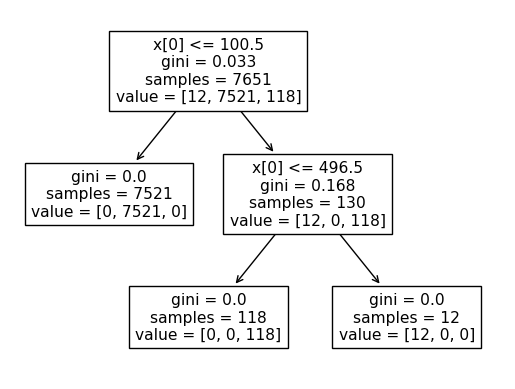

In [58]:
tree.plot_tree(mdl_tree_train)

[Text(0.4, 0.8333333333333334, 'x[0] <= 100.5\ngini = 0.033\nsamples = 7651\nvalue = [12, 7521, 118]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7521\nvalue = [0, 7521, 0]'),
 Text(0.6, 0.5, 'x[0] <= 496.5\ngini = 0.168\nsamples = 130\nvalue = [12, 0, 118]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]')]

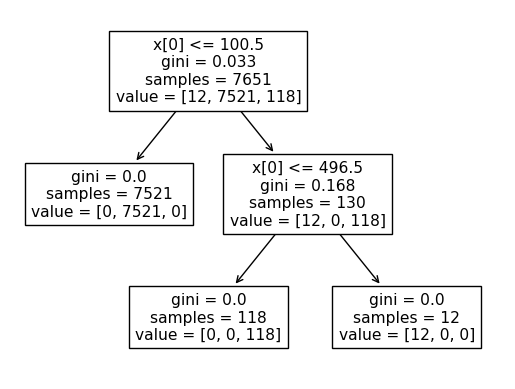

In [59]:
#Change depth of tree
mdl_tree_train = DecisionTreeClassifier(max_depth = 3)
mdl_tree_train.fit(X_train,y_train)
tree.plot_tree(mdl_tree_train)

[Text(0.4, 0.8333333333333334, 'x[0] <= 100.5\ngini = 0.033\nsamples = 7651\nvalue = [12, 7521, 118]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7521\nvalue = [0, 7521, 0]'),
 Text(0.6, 0.5, 'x[0] <= 496.5\ngini = 0.168\nsamples = 130\nvalue = [12, 0, 118]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]')]

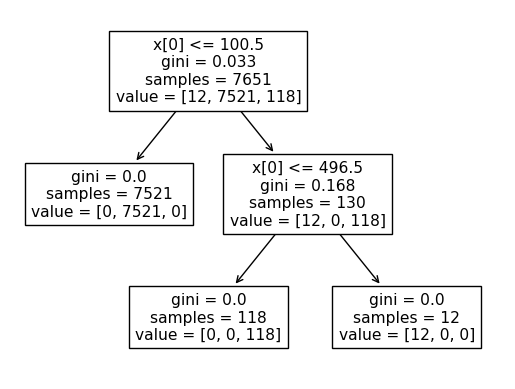

In [60]:
#Change depth of tree
mdl_tree_train = DecisionTreeClassifier(max_depth = 2)
mdl_tree_train.fit(X_train,y_train)
tree.plot_tree(mdl_tree_train)

C:\Users\sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


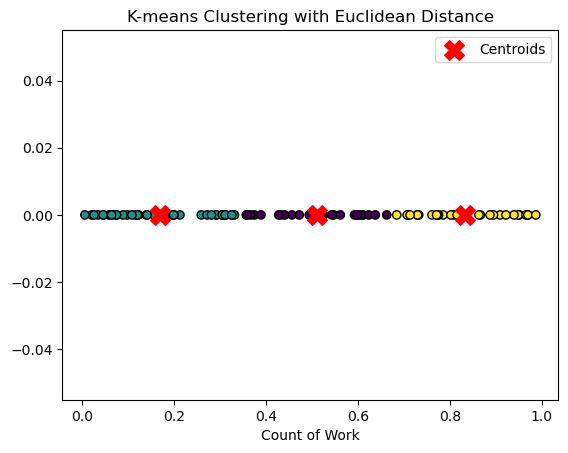

Distances to nearest centroid: [0.13713964 0.11847387 0.1002465  0.08697873 0.01206886 0.01209298
 0.11000389 0.03393571 0.08943525 0.12416786 0.14750301 0.13766941
 0.0002022  0.04425161 0.01373747 0.01531701 0.13615474 0.01307667
 0.07973474 0.12314164 0.10017314 0.02859364 0.12405715 0.14531791
 0.05560977 0.04706448 0.03158628 0.00255468 0.08073481 0.12163709
 0.09586509 0.00243662 0.10303591 0.1166451  0.13339159 0.02384309
 0.13652627 0.07041539 0.14800741 0.07152726 0.04604927 0.01650285
 0.13369898 0.07707996 0.09069248 0.15084253 0.14362358 0.00838826
 0.03503052 0.01676695 0.13734419 0.05710762 0.1072585  0.06258691
 0.08622022 0.0896338  0.079595   0.02789536 0.12286021 0.15724283
 0.12300247 0.10326153 0.00350293 0.15492643 0.11284701 0.03101633
 0.02716328 0.03004346 0.09353686 0.1546465  0.05999567 0.03062818
 0.16256538 0.01677901 0.12538309 0.10323327 0.06097009 0.09404285
 0.15321403 0.05221844 0.03086299 0.11161837 0.16281052 0.10452915
 0.14289482 0.15709582 0.102634

In [61]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

np.random.seed(42)
X = np.random.rand(100, 1)  # Replace this with your actual data

# Specify the number of clusters (K)
k = 3

# Instantiate the KMeans class with the Euclidean distance metric
kmeans = KMeans(n_clusters=k, random_state=42, algorithm='auto')

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate distances from each point to the nearest centroid
distances = pairwise_distances_argmin_min(X, centroids, metric='euclidean')[1]

# Visualize the data and clusters
plt.scatter(X, np.zeros_like(X), c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.scatter(centroids, np.zeros_like(centroids), c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Euclidean Distance')
plt.xlabel('Count of Work')
plt.legend()
plt.show()

# Print distances from each point to the nearest centroid
print("Distances to nearest centroid:", distances)





C:\Users\sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Cluster Center  Count in Cluster
0        8.198490             11391
1      752.846154                26
2     3681.000000                 3


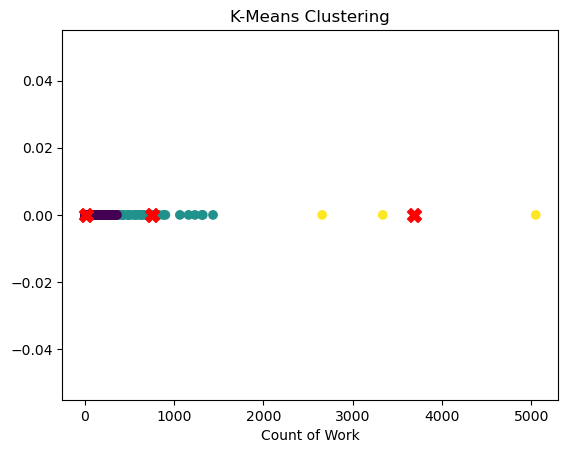

In [62]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
data = df.copy()

# Assuming 'Count of Work' is the column you want to use
X = data[['Count of Work']]

# Choose the number of clusters (you need to specify this)
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Print the cluster centers and counts
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Cluster Center'])
cluster_counts = data['Cluster'].value_counts().sort_index().rename('Count in Cluster')
print(pd.concat([cluster_centers, cluster_counts], axis=1))

# Visualize the clusters
plt.scatter(X, [0] * len(X), c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_, [0] * num_clusters, c='red', marker='X', s=100)
plt.xlabel('Count of Work')
plt.title('K-Means Clustering')
plt.show()


C:\Users\sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Cluster Center  Count in Cluster
0        8.198490             11391
1      752.846154                26
2     3681.000000                 3


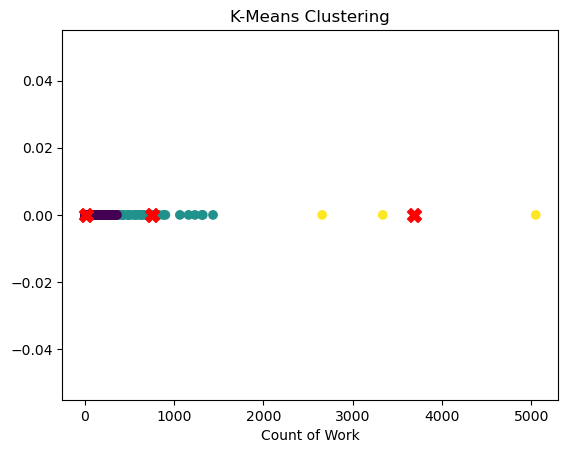

In [63]:

# Choose the number of clusters
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Print the cluster centers and counts
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Cluster Center'])
cluster_counts = data['Cluster'].value_counts().sort_index().rename('Count in Cluster')
print(pd.concat([cluster_centers, cluster_counts], axis=1))

# Visualize the clusters
plt.scatter(X, [0] * len(X), c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_, [0] * num_clusters, c='red', marker='X', s=100)
plt.xlabel('Count of Work')
plt.title('K-Means Clustering')
plt.show()


In [64]:
data.sample(10)

,ConstituentID,DisplayName,Nationality,BeginDate,EndDate,Count of Work,Gender_Numerical,Activity_Level,Cluster
9774,40552,Quay Brothers,American,1947,0,10,0,Low Activity,0
8812,33291,David Reinfurt,American,1971,0,0,0,Low Activity,0
4702,5512,Luis Alberto Solari,Uruguayan,1918,1993,2,0,Low Activity,0
5027,5897,Tonita Peña,Native American,1893,1949,1,1,Low Activity,0
9619,38678,Mateo López,Colombian,1978,0,129,0,Medium Activity,0
4313,5065,Pierre Roy,French,1880,1950,46,0,Low Activity,0
7189,12614,Harold Rosenberg,American,1906,1978,0,0,Low Activity,0
10577,48556,Park McArthur,American,1984,0,8,1,Low Activity,0
8248,29430,Dan Perjovschi,Romanian,1961,0,2,0,Low Activity,0
1617,1902,Floyd Fitzpatrick,American,0,0,1,0,Low Activity,0


In [65]:
data['Cluster'].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
11415    0
11416    0
11417    0
11418    0
11419    0
Name: Cluster, Length: 11420, dtype: int32>

In [66]:
# Assuming 'Cluster' is the column you created after k-means clustering
unique_clusters = data['Cluster'].unique()
print("Unique Clusters:", unique_clusters)


Unique Clusters: [0 1 2]


In [67]:
# Assuming 'Cluster' is the column you created after k-means clustering
cluster_counts = data['Cluster'].value_counts().sort_index()
print("Cluster Value Counts:")
print(cluster_counts)


Cluster Value Counts:
0    11391
1       26
2        3
Name: Cluster, dtype: int64


In [68]:
from sklearn.metrics import silhouette_score

# Assuming 'Count of Work' and 'Cluster' are the relevant columns
X = data[['Count of Work']]
labels = data['Cluster']

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.9797507384132403
